In [1]:
import pandas as pd 

In [2]:
#read the file and set the index columns as 1st column i.e 0th column
data = pd.read_csv('Advertising.csv',index_col=0)

In [3]:
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [4]:
data.shape

(200, 4)

Features:

1)TV: advertising dollars spent on TV for a single product in a given market(in thousand of dollars)

2)Radio: advertising dollars spent on Radio

3)Newspaper: adverstising dollars spent on Newspaper

Response:

Sales:sales of a single product in a given market(in thousands of items)

what else do we know?

1)Because response is continuous,this is a regression problem.

2)There are 200 observations (represented by the rows),each observation is a single market.  


In [5]:
#visualizing data using seaborn

In [6]:
import seaborn as sns
%matplotlib inline

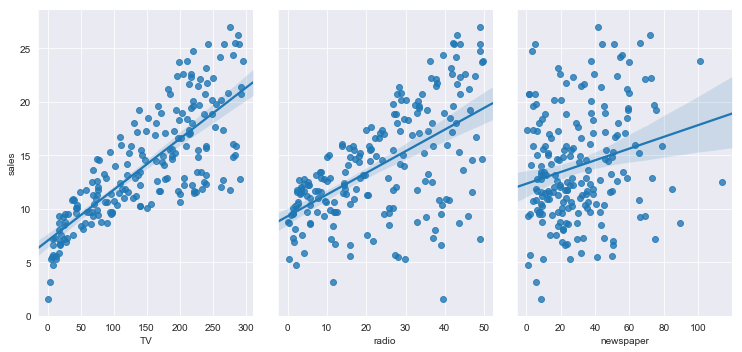

In [8]:
#visualize the relationship between features and response using scatterplots
sns.set_style('darkgrid')
sns.pairplot(data,x_vars=['TV','radio','newspaper'],y_vars='sales',size=5,aspect=0.7,kind='reg');

# Regression Vs Linear Regression:

Regression - Is the type of supervised learning problem,in which response is continuous

Linear Regression - Is particular ML model that can be used for regression problem,that has word
regression in its name.

Linear Regression Pros and Cons:

Pros: fast,no tuning required,highly interpretable, well understood

Cons: unlikely to produce the best predictive accuracy(presumes a linear relationship between the
features and response)  



Form of linear regression:

y = ß0 + ß1x1 + ß2x2 +.....+ßnxn

where:

B is beta

=> x is a feature

=> y is a response

=> B0 is the intecept(its value of y when all of the x values are 0). 

=> B1 is the coefficient for x1 (the first feature) 

=> Bn is the coefficient for xn (the nth feature)

In this case:

y = B0 + B1 * TV + B2 * Radio + B3 * Newspaper

The B values are called the model coefficients.The values are 'learned' during the model fitting step using the 'least squares' criterion.Then,the fitted model can be used to make predictions!     

In [9]:
#before we start the modelling with SK learn,we first have to define,X (feature matrix) and,
#y(response vector) to be numpy arrays!!
#scikit lean expects X and y to be numpy arrays,luckily panads is built on top of numpy,that means,
#there is a numpy array storing the data,therefore X can be pandas dataframe and y can b pandas series


In [10]:
#creating pyton list of feature names 
feature_cols = ['TV','radio','newspaper']

#use the list to select a subset of original dataframe
X = data[feature_cols]

#equivalent command to do this in one line
#first bracket to tell pandas,its subset of DF,second bracket to tell pandas,its python list 
X = data[['TV','radio','newspaper']]

#print first 5 rows
X.head()

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [11]:
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 3)


In [134]:
#select a series from dataframe(response vector)
y = data[['sales']]

#equivalent command to do that,works only if no space in column name 
#y = data.sales

#print first 5 rows
y.head()

,sales
1,22.1
2,10.4
3,9.3
4,18.5
5,12.9


In [135]:
print(type(y))
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 1)


Final step before using Linear regression model is to split x and y into,training and testing sets:

In [136]:
from sklearn.model_selection import train_test_split

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [138]:
#default split is 75% for training and 25% for testing
print('Training default 75% X:',X_train.shape)
print('Training default 75% y:',y_train.shape)
print('Testing default 25% X:',X_test.shape)
print('Testing default 25% y:',y_test.shape)

Training default 75% X: (150, 3)
Training default 75% y: (150, 1)
Testing default 25% X: (50, 3)
Testing default 25% y: (50, 1)


# Linear Regression in Scikit Learn: 

In [139]:
#import the LR model
from sklearn.linear_model import LinearRegression

In [140]:
#instantiate
linreg = LinearRegression()

In [141]:
#fit the model to the training data (learn the coefficients)
linreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

# Interpreting model Coefficients:

In [142]:
#print the intercept and coefficients
#'_' is for sklearn convention of any attribute that are estimated from data.
#coeffs are stores in coef attribute in same order,they are stored in feature matrix X,it can b hard,
#to remember that order,hence coeffes are paired with thepr resp. feature cols,using python zip   
print(linreg.intercept_)
print(linreg.coef_)


[2.87696662]
[[0.04656457 0.17915812 0.00345046]]


In [143]:
#pair the feature names with their resp. coeffs:
pair_values =  zip(feature_cols,linreg.coef_)
for feature_cols, linreg.coef_ in pair_values:
    print(feature_cols,',',linreg.coef_)

w , [0.04656457 0.17915812 0.00345046]


pair the feature names with the coefficients:

y = 2.88 + 0.0466 * TV + 0.179 * radio + 0.00345 * newspaper

How to interpret the TV coefficient(0.0466):

=> for a given amount of Radio and newspaper ad spending , a 'unit' increase in TV ad spending is associated with 0.0466 'unit' increase in sales.(i.e increasing TV by 1 will increase y response by 0.466),however unit of ad spending is $1,000 and unit of sales represents the 1000 items. 

=> Or more clearly: for the given amount of radio and newspaper ad spending, an additional $1,000 spent on TV ads is associated with an increase in sales of 46.6 items.

=> same above process can be used to interpret the coeffs of radio and newspaper.  

Important Notes:

=> This is a statement of association,not causation i.e as mentioned in the interpretation of Tv coeff that,Tv ad spending is associated,not causated because its difficult to determine causation as it requires access to every possible factors that could have been influence sales,but all we have is data on ad spending,thats why ML tends to depend on association rather than causation.    

=> if an increase in Tv ad spending was associated with a decrease in sales,B1(beta1)coeff would be negative. 


In [144]:
#making predictions on testing data
#we cant use classification accuracy as evaluation metric,as it has regression problem has,
#continuous response  
y_pred = linreg.predict(X_test)
#lets look at common evaluation metric for regression and choose one to evaluate our predictions

Model Evaluation metrics for regression:

we need an evaluation metric in order to compare predictions with actual values.

lets look at some examples for numeric predictions and evaluate them with specific metric,to see,
how it works.


In [145]:
#1) Mean Absolute Error:
#lets take an example response(both true and predicted )
true = [100,50,30,20]
pred = [90,50,50,30]

Mean absolute error(MAE):

MAE is the simplest metric,its the mean for the absolute value of errors,
error is simply the difference between the true and predicted value.

In [146]:
#calculate MAE by hand
errors = 10+0+20+10
MAE = errors/4
print(MAE)
#in the above code 10,0,20,10 are errors,its nothing but the difference in the true and predicted,
#response

#calculate MAE by using sklearn
from sklearn import metrics
print(metrics.mean_absolute_error(true,pred))

10.0
10.0


Mean Squared error(MSE):

MSE is same as MAE,except that each error is squared,so for above example we have to calculate,
10 sqaure,0 square,20 square,10 square and then add then and divide by 4.MSE is harder to interpret than MAE.

In [147]:
#calculate MSE by hand
errors = 10**2 + 0**2 + 20**2 + 10**2
MSE = errors/4
print(MSE)

#in the above code 10**2,0**2,20**2,10**2 are errors,its nothing but the difference in the true and,
#predicted response

#calculate MSE by using sklearn
from sklearn import metrics
print(metrics.mean_squared_error(true,pred))

150.0
150.0


Root mean squared error(RMSE):

RMSE is identical to MSE,except the square root is taken at the end of the calulation.RMSE increases the weight of errors as it squares the errors,same as MSE 


In [148]:
#to calulate the quare root we have to use numpy
import numpy as np 

In [149]:

#calculate RMSE by hand
errors = 10**2 + 0**2 + 20**2 + 10**2
MSE = errors/4
print(np.sqrt(MSE))

#in the above code 10**2,0**2,20**2,10**2 are errors,its nothing but the difference in the true and,
#predicted response

#calculate RMSE by using sklearn
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(true,pred)))

12.24744871391589
12.24744871391589


Comparing these metrics:

=> MAE is easiest to understand,because its average error.

=> MSE is more popular than MAE,because MSE 'punishes' larger errors,and in real world examples its necessary to minimize the larger errors than smaller errors. 

=> RMSE is even popular than MSE,because RMSE is interpretable in the 'y' units.In other words MSE of 150 from above example is hard to interpret while RMSE of 12.24 is easier to put in context as its in same unit as response varibale.    

In [151]:
#Use RMSE as evaluation metrics
#Computing RMSE for sales predictions
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

1.4046514230328953


In [152]:
#result 1.40 seems good since the range of sales is from 5 to 25

since we saw that newspaper feature had the weakest correlation with sales,so we will remove the,newspaper column from feature and see how it effects our RMSE.  


Feature Selection

In [155]:
#creating new python list for only tv and radio
feature_cols = ['TV','radio',]

# use list to select a subset of riginal dataframe
X = data[feature_cols]

#select a series from dataframe
y = data[['sales']]

#again split the tarining and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

#fit the model with traing data
linreg.fit(X_train,y_train)

#make predictions
y_pred = linreg.predict(X_test)

#Computing RMSE for sales predictions of from new set
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

1.3879034699382888


RMSE is decreased when newpaper col is removed,error is something that we want to minimize,so lower the number of error the better.Thus its unlikely that this feature(newspaper) is useful for predicting sales,and should be removed from model.   

In [169]:
#making predictions for new set with features TV and Radio 
y_pred = linreg.predict([[44.5,39.3]])

In [170]:
print(y_pred)

[[12.12139945]]


In [166]:
data.drop('newspaper',axis=1).head()

,TV,radio,sales
1,230.1,37.8,22.1
2,44.5,39.3,10.4
3,17.2,45.9,9.3
4,151.5,41.3,18.5
5,180.8,10.8,12.9


In [171]:
print(linreg.predict([[230.1,37.3]]))

[[20.4084347]]


In [172]:
print(linreg.predict([[151.5,41.3]]))

[[17.47020909]]


In [173]:
print(linreg.predict([[180.5,10.3]]))

[[13.20510962]]


In [174]:
print(linreg.predict([[15.5,18.3]]))

[[6.96516014]]
